# Assignment 3 Bank Marketing Data Set

**Nama : Nafiatul Risa**

**Kode : PYTN-KS09-022**

# Project Overview

The data is related with direct marketing campaigns of a Portuguese banking institution. The
marketing campaigns were based on phone calls. Often, more than one contact to the same client
was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no')
subscribed.
There are four datasets:
1. **bank-additional-full.csv** with all examples (41188) and 20 inputs, ordered by date (from May
2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2. **bank-additional.csv** with 10% of the examples (4119), randomly selected from 1), and 20
inputs.
3. **bank-full.csv** with all examples and 17 inputs, ordered by date (older version of this dataset
with less inputs).
4. **bank.csv** with 10% of the examples and 17 inputs, randomly selected from 3 (older version of
this dataset with less inputs).

The smallest datasets are provided to test more computationally demanding machine learning
algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

This dataset contains:

Input variables:

**# bank client data:**
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','bluecollar','entrepreneur','housemaid','management','retired','selfemployed','services','student','technician',' unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no', 'yes', 'unknown')
6 - housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
7 - loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

**# related with the last contact of the current campaign:**
8 - contact: contact communication type (categorical: 'cellular', 'telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**# other attributes:**
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent','success')

**# social and economic context attributes** 
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**
21 - y - has the client subscribed a term deposit? (binary: 'yes', 'no')


# Project Rubric

**Code Review** 

| **Criteria** | **Meet Expectations** |
| :------------ | :--------------------- |
| Logistic Regression | Mengimplementasikan Logistic Regression Dengan Scikit-Learn |
| K-Nearest Neighbors | Mengimplementasikan K-Nearest Neighbors Dengan Scikit-Learn |
| Support Vector | Machine Mengimplementasikan Support Vector Machine Dengan Scikit-Learn |
| Decision Tree | Mengimplementasikan Decision Tree Dengan Scikit-Learn |
| Random Forest | Mengimplementasikan Random Forest Dengan Scikit-Learn |
| Naive Bayes | Mengimplementasikan Naive Bayes Dengan Scikit-Learn |
| Confusion Matrix | Mengimpelentasikan Confusion Matrix Regression Dengan ScikitLearn |
| Visualization | Menganalisa Data Menggunakan Setidaknya 2 Tipe Grafik/Plot. |
| Preprocessing | Melakukan Preproses Dataset Sebelum Melakukan Penelitian Lebih Dalam. |
| Apakah Kode Berjalan Tanpa Ada Eror? | Kode Berjalan Tanpa Ada Eror. Seluruh Kode Berfungsi Dan Dibuat Dengan Benar. |

**Readability** 

| **Criteria** | **Meet Expectations** |
| :------------ | :--------------------- |
| Tertata Dengan Baik | Semua Cell Di Notebook Terdokumentasi Dengan Baik Dengan Markdown Pada Tiap Cell Untuk Penjelasan Kode. |

**Analysis** 

| **Criteria** | **Meet Expectations** |
| :------------ | :--------------------- |
| Algorithm Analysis | Student Menjelaskan Alasan Mengapa Memilih Menggunakan Algoritma Tersebut Untuk Membuat Model. |

# A. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, normalize, StandardScaler
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# B. Data Preprocessing

In [2]:
# Mendeteksi format dari non standard missing values
missing = ['NA', 'NaN', 'na', 'n/a', 'N/A', 'n-a', ' ', ' -  ',  "--", "?"]

df= pd.read_csv('./dataset/bank-additional-full.csv', sep=';', na_values=missing)

df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
#Dimension of dataframe
rows, columns = df.shape
print("Dimensi data:")
print(rows, "baris")
print(columns, "kolom")

Dimensi data:
41188 baris
21 kolom


In [5]:
df.index

RangeIndex(start=0, stop=41188, step=1)

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [8]:
# Melihat nilai unique
for col in df.columns:
    print("Nilai Unique Kolom", col)
    print(df[col].unique())
    print("-"*80)

Nilai Unique Kolom age
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
--------------------------------------------------------------------------------
Nilai Unique Kolom job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
--------------------------------------------------------------------------------
Nilai Unique Kolom marital
['married' 'single' 'divorced' 'unknown']
--------------------------------------------------------------------------------
Nilai Unique Kolom education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
--------------------------------------------------------------------------------
Nilai Unique Kolom default
[

In [9]:
print('Jumlah Missing Value tiap column: ')
df.isnull().sum() #Check if any column has null values

Jumlah Missing Value tiap column: 


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
print('Jumlah Duplicate Data ', df.duplicated().sum()) #Check duplicate data

Jumlah Duplicate Data  12


**Analisis :**

Berdasarkan hasil diatas, ditemukan bahwa:
1. Dimensi data sejumlah 41188 baris dan 21 kolom ('age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y')
2. Index data mulai dari 0 sampai 41188
3. Tidak terdapat missing value
4. Terdapat duplicate data sejumlah 12 data
5. pada column pdays terdapat data 999 yang artinya berarti klien tidak pernah dihubungi sebelumnya, jadi untuk data 999 ini akan diganti dengan 0. 

# C. Data Cleaning

In [11]:
# Delete Duplicate column
df.drop_duplicates(subset=df.columns,keep='first', inplace=True)

df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [12]:
# Mengganti nama kolom 'y' menjadi 'subs.deposit'
df.rename(columns={'y':'subs.deposit'}, inplace=True)

In [13]:
# Mengganti nilai 999 pada pdays menjadi 0
df['pdays'].replace(999, 0, inplace=True)

In [14]:
# Mengelompokkan kolom numerik dan kategorikal 
numeric_columns = list(df.select_dtypes(include=['int64']).columns.values) + list(df.select_dtypes(include=['float64']).columns.values)
categoric_columns = list(df.select_dtypes(include=['object']))

print('Numerik :', numeric_columns)
print('Kategorik :', categoric_columns)

Numerik : ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Kategorik : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'subs.deposit']


**Analisis :**

Beberapa hal yang saya lakukan saat cleaning:
1. Mengelompokkan kolom numerik dan kategorik
2. Menghapus duplicate data
3. Mengganti nama kolom 'y' menjadi 'subs.deposit'
4. Mengganti nilai 999 pada p days yang berarti klien tidak pernah dihubungi sebelumnya menjadi nilai 0.

# D. Data Visualization

**Question:** 
1. Berapa presentase dari nasabah yang berlangganan deposito jangka panjang dan yang tidak berlangganan?
2. Berapa perbandingan jumlah nasabah berdasarkan umur?
3. Berapa jumlah nasabah berdasarkan pekerjaan dan tingkat pendidikannya?
4. Berapa jumlah nasabah di masing-masing status pernikahan?

**Pre-processing if needed**

**Visualization**

no     36537
yes     4639
Name: subs.deposit, dtype: int64


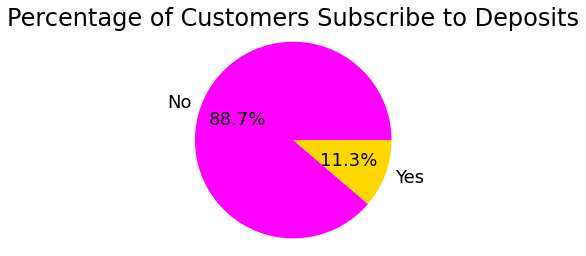

In [15]:
# Answer 1
plt.title("Percentage of Customers Subscribe to Deposits", fontsize=24)
subscribed_values_count = df['subs.deposit'].value_counts()
subscribed_size = subscribed_values_count.values.tolist()
subscribed_labels = 'No', 'Yes'
colors = ['fuchsia', 'gold']
pcs, texts, autotexts = plt.pie(subscribed_size,
                                labels=subscribed_labels,
                                colors=colors,
                                autopct='%1.1f%%',
                                shadow=False,
                                startangle=0)

for text, autotext in zip(texts, autotexts):
    text.set_fontsize(18)
    autotext.set_fontsize(18)

plt.axis('equal')
print(subscribed_values_count)
plt.show()

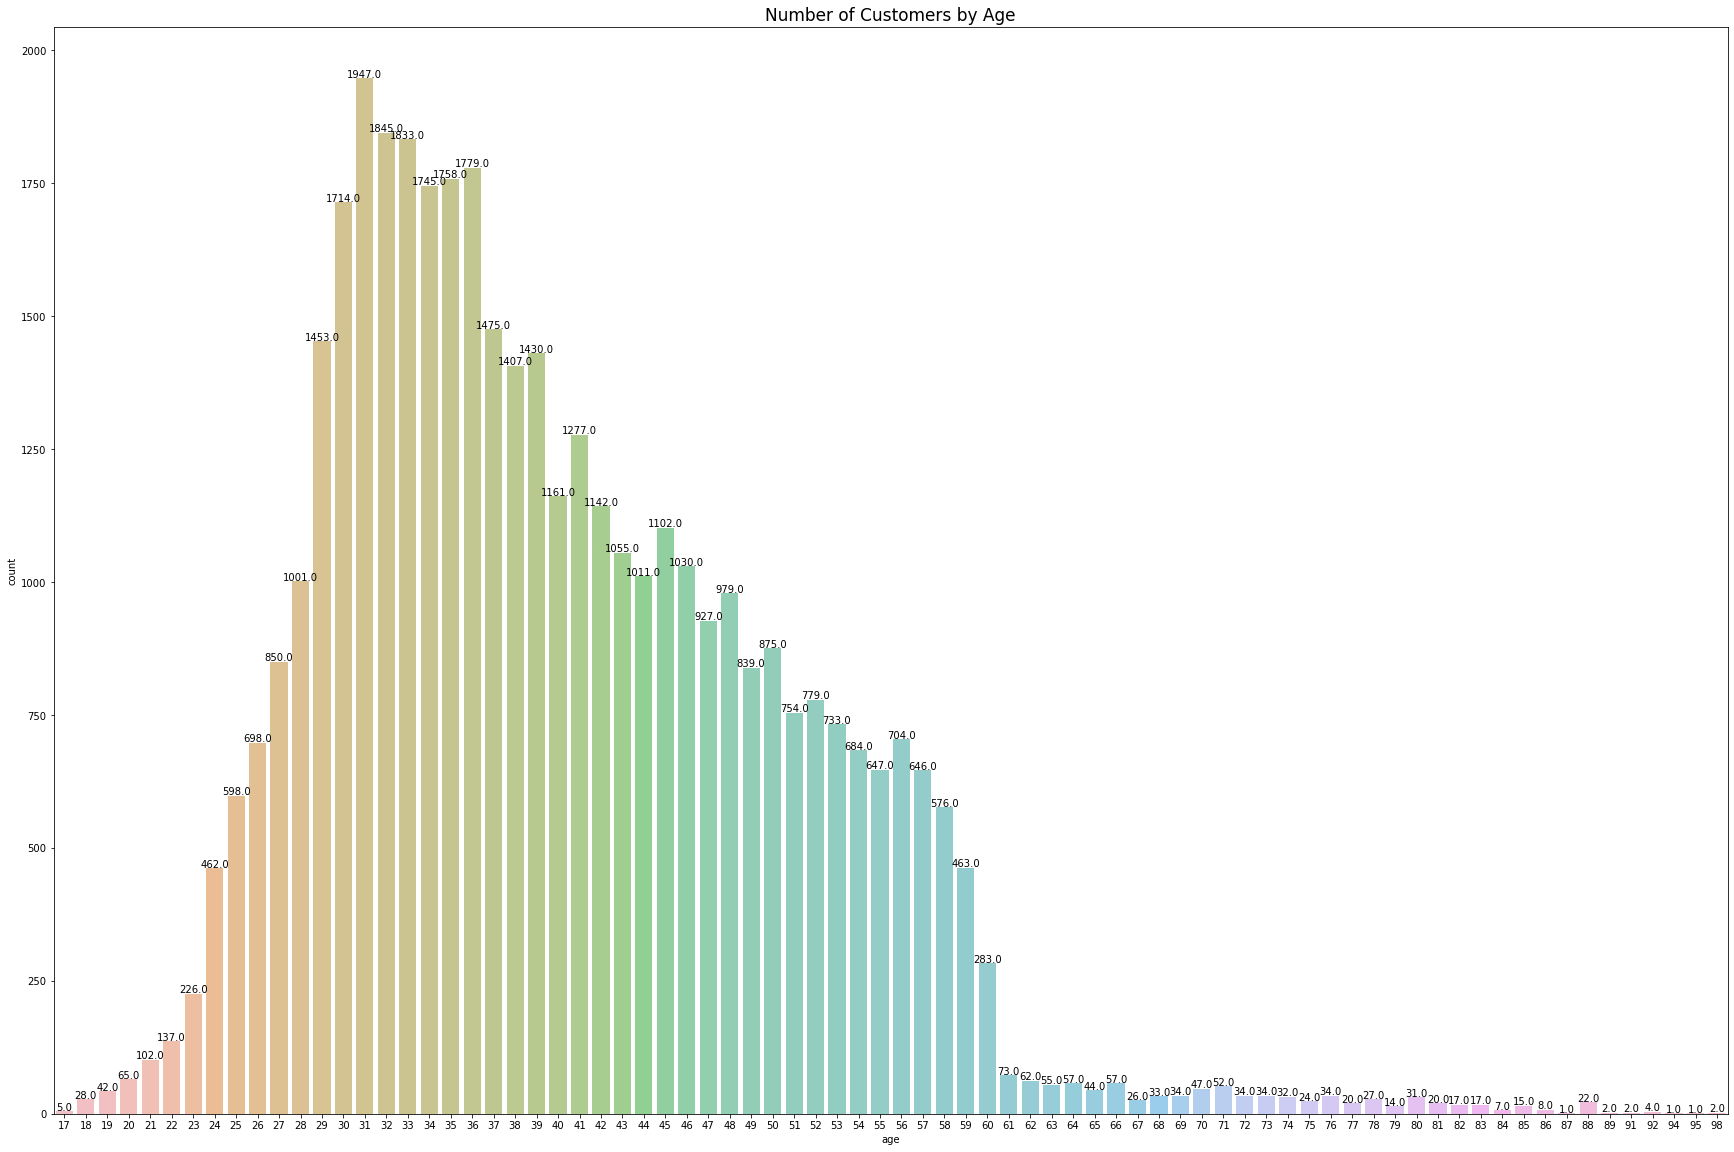

In [16]:
# Answer 2
plt.rcParams['figure.figsize'] = (30, 20)
plt.title("Number of Customers by Age", fontsize=17)
ax = sns.countplot(x='age', data=df, alpha=0.6)
for i in ax.patches:
    ax.annotate(format(i.get_height(), '.1f'),
                (i.get_x() + i.get_width()/2., i.get_height()),
                ha='center',
                va='center',
                xytext=(0, 4),
                textcoords='offset points')

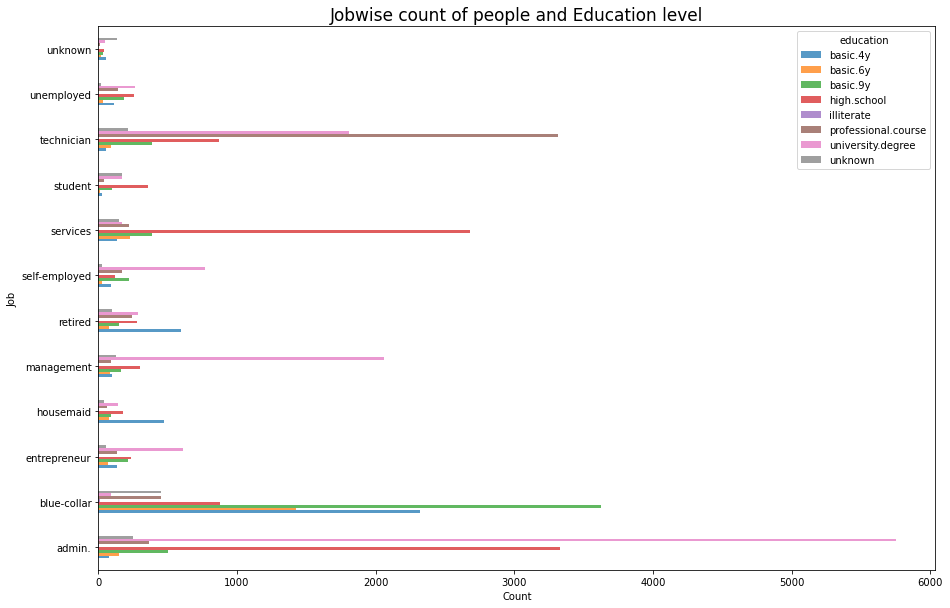

In [17]:
# Answer 3
df_3 = pd.pivot_table(df,
                      columns='education',
                      index='job',
                      aggfunc='count',
                      values='age')
df_3.plot(kind='barh',
          stacked=False,
          figsize=(15, 10),
          alpha=0.75)
plt.title('Jobwise count of people and Education level', fontsize=17)
plt.ylabel('Job')
plt.xlabel('Count')
plt.show()

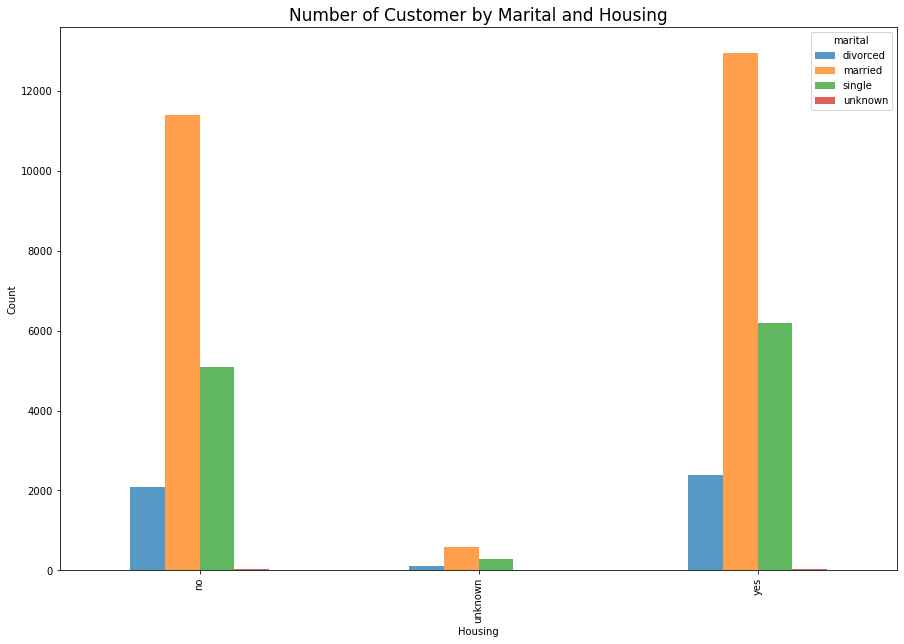

In [18]:
# Answer 4
df_4 = pd.pivot_table(df,
                      columns='marital',
                      index='housing',
                      aggfunc='count',
                      values='age')
df_4.plot(kind='bar',
          stacked=False,
          figsize=(15, 10),
          alpha=0.75)
plt.title('Number of Customer by Marital and Housing', fontsize=17)
plt.ylabel('Count')
plt.xlabel('Housing')
plt.show()

**Analisis :**

Berdasarkan dari exploratory data diatas:
1. Hanya terdapat 4639 nasabah yang berlangganan term deposit dengan presentase 11,3%. 
2. Nasabah bank paling banyak berumur 31 tahun dengan jumlah 1947 nasabah. Nasabah mendominasi pada rentang umur akhir 20 an sampai awal 40 an. 
3. Pada pekerjaan technician, pendidikannya paling banyak pada profesional course. Pada pekerjaan service, pendidikan paling banyak pada high school. Pada pekerjaan management, entrepreneur, dan admin, pendidikan paling banyak pada university degree. Pada pekerjaan housemaid dan retired, pendidikan paling banyak pada basic 4 year. 
4. Rata-rata nasabah sudah menikah dan memiliki housing loan.

# E. Modelling

**Pre-processing if needed**

In [19]:
# Encoding data kategorikal
df_enc = df.copy()
le = preprocessing.LabelEncoder()


def transfrom(col):
    a = le.fit_transform(df[col])
    pd.DataFrame(a)
    df_enc[col] = a


for i in categoric_columns:
    transfrom(i)

df_enc

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subs.deposit
0,56,3,1,0,0,0,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,...,1,0,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,...,1,0,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,...,2,0,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,...,1,0,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [20]:
# Split dataset into features(X) and labels(y)
X = df_enc.drop('subs.deposit', axis=1)
y = df_enc['subs.deposit']

In [21]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Scaling data
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

**1. Logistic Regression**

In [22]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [23]:
# Evaluasi model
y_pred1 = lr.predict(X_test)
print("Accuracy score :", accuracy_score(y_test, y_pred1))

# Confusion Matrix
matrix1=confusion_matrix(y_test, y_pred1)
print("Confusion Matrix :\n", matrix1)

# Classification Report
print("Classification Report :\n", classification_report(y_test, y_pred1))

Accuracy score : 0.9066623492269085
Confusion Matrix :
 [[10654   265]
 [  888   546]]
Classification Report :
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     10919
           1       0.67      0.38      0.49      1434

    accuracy                           0.91     12353
   macro avg       0.80      0.68      0.72     12353
weighted avg       0.89      0.91      0.90     12353



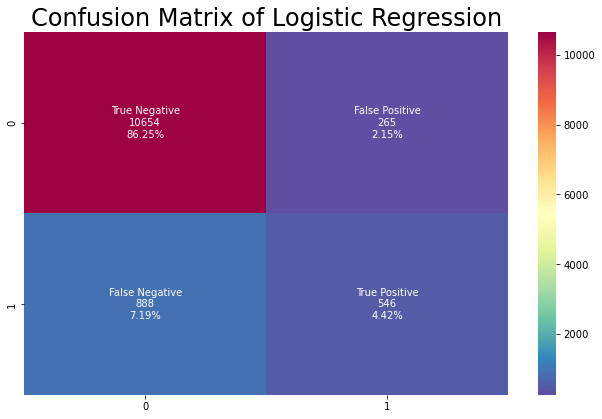

In [24]:
# Heatmap from Confusion Matrix
names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
counts = ["{0:0.0f}".format(value) for value in matrix1.flatten()]
percentages = ["{0:.2%}".format(value)
               for value in matrix1.flatten()/np.sum(matrix1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,
          v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2, 2)

f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(matrix1, annot=labels, fmt='', cmap='Spectral_r')
plt.title("Confusion Matrix of Logistic Regression", fontsize=24)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
plt.show()

Dari hasil logistic regression diatas, didapatkan informasi :
1. Accuracy score 90,6%
2. Prediksi True negative 10.654 
3. Prediksi False Negative 888
4. Prediksi True Positive 546
5. Prediksi False Positive 265
6. Accuracy clasification report 91%

**2. K-Nearest Neighbors (KNN)**

In [25]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
# Evaluasi model
y_predknn = knn.predict(X_test)
print("Accuracy score :", accuracy_score(y_test, y_predknn))

# Confusion Matrix
matrixknn=confusion_matrix(y_test, y_predknn)
print("Confusion Matrix :\n", matrixknn)

# Classification Report
print("Classification Report :\n", classification_report(y_test, y_predknn))

Accuracy score : 0.8984861976847729
Confusion Matrix :
 [[10563   356]
 [  898   536]]
Classification Report :
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     10919
           1       0.60      0.37      0.46      1434

    accuracy                           0.90     12353
   macro avg       0.76      0.67      0.70     12353
weighted avg       0.88      0.90      0.89     12353



In [28]:
# Improve model dan mencari nilai k yang paling optimal

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    kn = KNeighborsClassifier(n_neighbors=i)
    kn.fit(X_train, y_train)
    pred_i = kn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error mean')

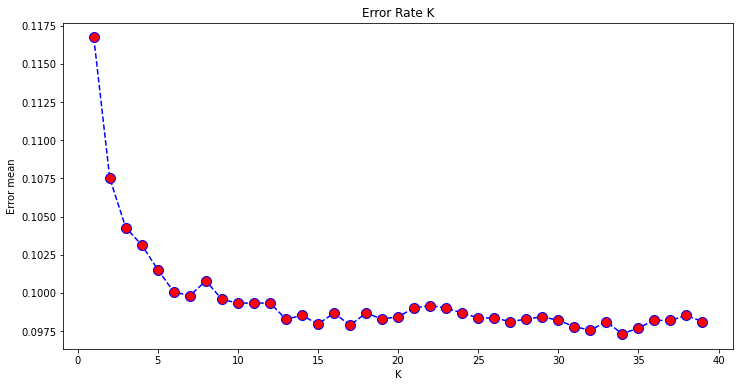

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate K')
plt.xlabel('K')
plt.ylabel('Error mean')

In [30]:
# Cek akurasi model untuk nilai k = 34
knn34 = KNeighborsClassifier(n_neighbors=34)
knn34.fit(X_train, y_train)

# Evaluasi model
y_pred2 = knn34.predict(X_test)
print("Accuracy score :", accuracy_score(y_test, y_pred2))

# Confusion Matrix
matrix2=confusion_matrix(y_test, y_pred2)
print("Confusion Matrix :\n", matrix2)

# Classification Report
print("Classification Report :\n", classification_report(y_test, y_pred2))

Accuracy score : 0.9026957014490408
Confusion Matrix :
 [[10743   176]
 [ 1026   408]]
Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.98      0.95     10919
           1       0.70      0.28      0.40      1434

    accuracy                           0.90     12353
   macro avg       0.81      0.63      0.68     12353
weighted avg       0.89      0.90      0.88     12353



Dari hasil K-Nearest Neighbors (KNN) diatas, didapatkan informasi :
1. Accuracy score 90%
2. Prediksi True negative 10.743
3. Prediksi False Negative 1026
4. Prediksi True Positive 408
5. Prediksi False Positive 176
6. Accuracy clasification report 90%

**3. Support Vector Machine (SVM)**

In [31]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [32]:
# Evaluasi model
y_pred3 = svm.predict(X_test)
print("Accuracy score :", accuracy_score(y_test, y_pred3))

# Confusion Matrix
matrix3 = confusion_matrix(y_test, y_pred3)
print("Confusion Matrix :\n", matrix3)

# Classification Report
print("Classification Report :\n", classification_report(y_test, y_pred3))

Accuracy score : 0.9067433012223751
Confusion Matrix :
 [[10683   236]
 [  916   518]]
Classification Report :
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     10919
           1       0.69      0.36      0.47      1434

    accuracy                           0.91     12353
   macro avg       0.80      0.67      0.71     12353
weighted avg       0.89      0.91      0.89     12353



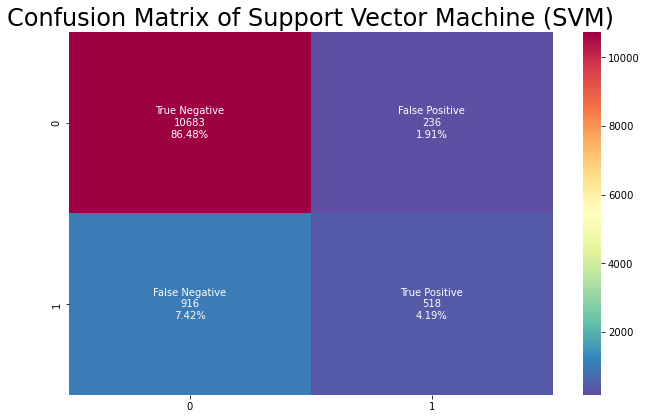

In [33]:
# Heatmap from Confusion Matrix
names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
counts = ["{0:0.0f}".format(value) for value in matrix3.flatten()]
percentages = ["{0:.2%}".format(value)
               for value in matrix3.flatten()/np.sum(matrix3)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,
          v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2, 2)

f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(matrix2, annot=labels, fmt='', cmap='Spectral_r')
plt.title("Confusion Matrix of Support Vector Machine (SVM)", fontsize=24)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
plt.show()

Dari hasil Support Vector Machine (SVM) diatas, didapatkan informasi :
1. Accuracy score 90,6%
2. Prediksi True negative 10.683
3. Prediksi False Negative 916
4. Prediksi True Positive 518
5. Prediksi False Positive 236
6. Accuracy clasification report 91%

**4. Decision Tree**

In [34]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
# Evaluasi model
y_pred4 = dt.predict(X_test)
print("Accuracy score :", accuracy_score(y_test, y_pred4))

# Confusion Matrix
matrix4 = confusion_matrix(y_test, y_pred4)
print("Confusion Matrix :\n", matrix4)

# Classification Report
print("Classification Report :\n", classification_report(y_test, y_pred4))

Accuracy score : 0.8835100785234355
Confusion Matrix :
 [[10153   766]
 [  673   761]]
Classification Report :
               precision    recall  f1-score   support

           0       0.94      0.93      0.93     10919
           1       0.50      0.53      0.51      1434

    accuracy                           0.88     12353
   macro avg       0.72      0.73      0.72     12353
weighted avg       0.89      0.88      0.89     12353



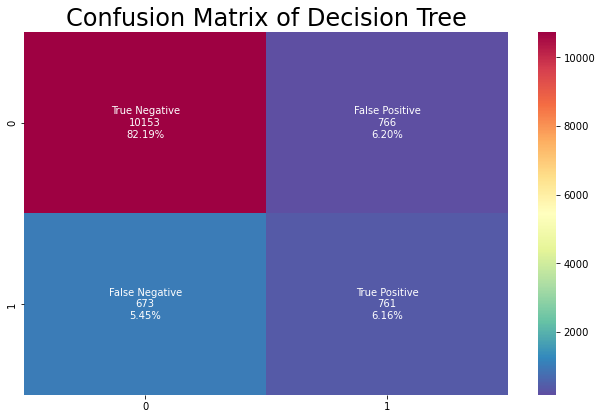

In [36]:
# Heatmap from Confusion Matrix
names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
counts = ["{0:0.0f}".format(value) for value in matrix4.flatten()]
percentages = ["{0:.2%}".format(value)
               for value in matrix4.flatten()/np.sum(matrix4)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,
          v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2, 2)

f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(matrix2, annot=labels, fmt='', cmap='Spectral_r')
plt.title("Confusion Matrix of Decision Tree", fontsize=24)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
plt.show()

Dari hasil Decision Tree diatas, didapatkan informasi :
1. Accuracy score 88%
2. Prediksi True negative 10.153
3. Prediksi False Negative 673
4. Prediksi True Positive 761
5. Prediksi False Positive 766
6. Accuracy clasification report 88%

**5. Random Forest**

In [37]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [38]:
# Evaluasi model
y_pred5 = rf.predict(X_test)
print("Accuracy score :", accuracy_score(y_test, y_pred5))

# Confusion Matrix
matrix5 = confusion_matrix(y_test, y_pred5)
print("Confusion Matrix :\n", matrix5)

# Classification Report
print("Classification Report :\n", classification_report(y_test, y_pred5))

Accuracy score : 0.9140289808143771
Confusion Matrix :
 [[10552   367]
 [  695   739]]
Classification Report :
               precision    recall  f1-score   support

           0       0.94      0.97      0.95     10919
           1       0.67      0.52      0.58      1434

    accuracy                           0.91     12353
   macro avg       0.80      0.74      0.77     12353
weighted avg       0.91      0.91      0.91     12353



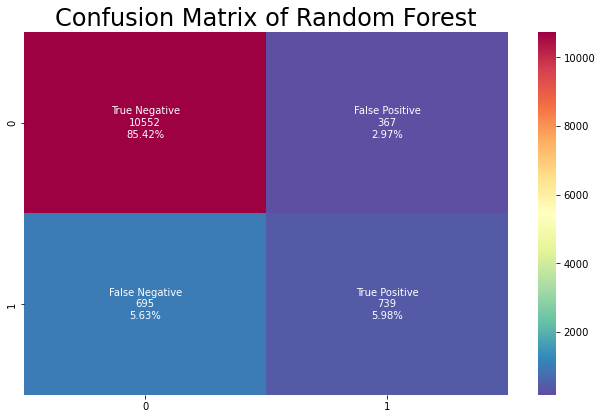

In [39]:
# Heatmap from Confusion Matrix
names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
counts = ["{0:0.0f}".format(value) for value in matrix5.flatten()]
percentages = ["{0:.2%}".format(value)
               for value in matrix5.flatten()/np.sum(matrix5)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,
          v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2, 2)

f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(matrix2, annot=labels, fmt='', cmap='Spectral_r')
plt.title("Confusion Matrix of Random Forest", fontsize=24)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
plt.show()

Dari hasil Random Forest diatas, didapatkan informasi :
1. Accuracy score 91%
2. Prediksi True negative 10.552
3. Prediksi False Negative 695
4. Prediksi True Positive 739
5. Prediksi False Positive 367
6. Accuracy clasification report 91%

**6. Naive Bayes**

In [40]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [41]:
# Evaluasi model
y_pred6 = nb.predict(X_test)
print("Accuracy score :", accuracy_score(y_test, y_pred6))

# Confusion Matrix
matrix6 = confusion_matrix(y_test, y_pred6)
print("Confusion Matrix :\n", matrix6)

# Classification Report
print("Classification Report :\n", classification_report(y_test, y_pred6))

Accuracy score : 0.8479721525135595
Confusion Matrix :
 [[9620 1299]
 [ 579  855]]
Classification Report :
               precision    recall  f1-score   support

           0       0.94      0.88      0.91     10919
           1       0.40      0.60      0.48      1434

    accuracy                           0.85     12353
   macro avg       0.67      0.74      0.69     12353
weighted avg       0.88      0.85      0.86     12353



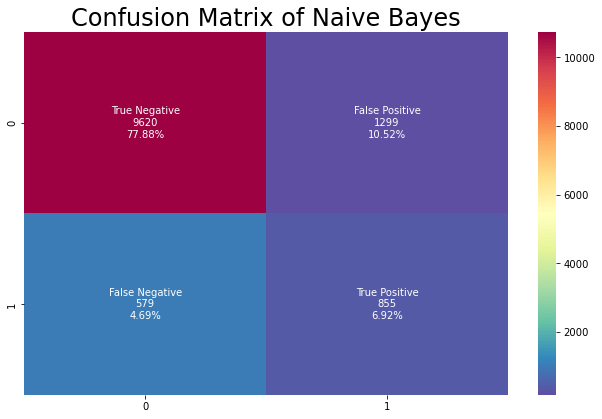

In [42]:
# Heatmap from Confusion Matrix
names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
counts = ["{0:0.0f}".format(value) for value in matrix6.flatten()]
percentages = ["{0:.2%}".format(value)
               for value in matrix6.flatten()/np.sum(matrix6)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,
          v3 in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2, 2)

f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(matrix2, annot=labels, fmt='', cmap='Spectral_r')
plt.title("Confusion Matrix of Naive Bayes", fontsize=24)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
plt.show()

Dari hasil Naive Bayes diatas, didapatkan informasi :
1. Accuracy score 84%
2. Prediksi True negative 9620
3. Prediksi False Negative 579
4. Prediksi True Positive 855
5. Prediksi False Positive 1299
6. Accuracy clasification report 85%

# F. Algorithm Analysis

In [43]:
print("~~~~~~~~~ Hasil Akurasi dari Semua Model ~~~~~~~~~")
print("Logistic Regression          :", accuracy_score(y_test, y_pred1))
print("K-Nearest Neighbors (KNN)    :", accuracy_score(y_test, y_pred2))
print("Support Vector Machine (SVM) :", accuracy_score(y_test, y_pred3))
print("Decision Tree                :", accuracy_score(y_test, y_pred4))
print("Random Forest                :", accuracy_score(y_test, y_pred5))
print("Naive Bayes                  :", accuracy_score(y_test, y_pred6))

~~~~~~~~~ Hasil Akurasi dari Semua Model ~~~~~~~~~
Logistic Regression          : 0.9066623492269085
K-Nearest Neighbors (KNN)    : 0.9026957014490408
Support Vector Machine (SVM) : 0.9067433012223751
Decision Tree                : 0.8835100785234355
Random Forest                : 0.9140289808143771
Naive Bayes                  : 0.8479721525135595


In [44]:
print('Model yang memiliki accuracy score tertinggi adalah Random Forest dan nilai akurasinya:')
print(accuracy_score(y_test, y_pred5))
print('Berikut classification report nya:')
print(classification_report(y_test, y_pred5))

Model yang memiliki accuracy score tertinggi adalah Random Forest dan nilai akurasinya:
0.9140289808143771
Berikut classification report nya:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10919
           1       0.67      0.52      0.58      1434

    accuracy                           0.91     12353
   macro avg       0.80      0.74      0.77     12353
weighted avg       0.91      0.91      0.91     12353

